# bkds case study - exploratory data mining

In [38]:
#imports
import pandas as pd
import numpy as np

In [2]:
# load in the data sets
def load_df(df_file):
    basepath = 'data/'
    filepath = basepath + df_file
    load_df = pd.DataFrame.from_csv(filepath)
    return load_df

In [25]:
ny_df = load_df('NY_df.csv')

In [26]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,Entire home/apt,5
1,2,7,12022627,2200,Apartment,0,Entire home/apt,0
2,1,2,8940740,149,Apartment,6,Entire home/apt,5
3,1,4,12035970,55,Apartment,0,Entire home/apt,0
4,1,2,11642165,65,Apartment,3,Private room,5


In [20]:
# Overwhelming number of apartments compared to other property types
ny_df.Property_Type.value_counts()

Apartment          280
House               14
Townhouse            5
Loft                 4
Other                1
Condominium          1
Bed & Breakfast      1
dtype: int64

In [5]:
# Data types of columns in df
ny_df.dtypes

Bedrooms           int64
Capacity           int64
Id                 int64
Price              int64
Property_Type     object
Review_Count       int64
Room_Type         object
Star_Rating      float64
dtype: object

In [27]:
def preprocess_data(df):
    """Take in df and map/dummify object columns"""

    # process non-numeric data types
    df['Room_Type'] = df.Room_Type.map({'Shared room':0,'Private room':1, 'Entire home/apt':2})

    # get_dummies for Property_Type, initially was going to do, but not enough non-Apartments
    #temp_df pd.get_dummies(df.Property_Type, prefix='Ptype')  # e.g. 'Property_Type' => 'Ptype_Apartment'
    #df = pd.concat([df, temp_df])

    return df 

In [28]:
ny_df = preprocess_data(ny_df)

In [29]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,2,5
1,2,7,12022627,2200,Apartment,0,2,0
2,1,2,8940740,149,Apartment,6,2,5
3,1,4,12035970,55,Apartment,0,2,0
4,1,2,11642165,65,Apartment,3,1,5


In [30]:
# summary stats on some of the variables
ny_df.describe()

,Bedrooms,Capacity,Id,Price,Review_Count,Room_Type,Star_Rating
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.869281,2.218954,8085420.986928,104.428105,14.601307,1.450980,3.485294
std,0.460830,1.056332,3408041.616683,129.893511,24.689904,0.536426,2.142607
min,0.000000,1.000000,3831.000000,20.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,5606435.250000,61.250000,2.000000,1.000000,0.000000
50%,1.000000,2.000000,9070885.500000,90.000000,5.000000,1.000000,4.500000
75%,1.000000,2.000000,10886453.000000,119.000000,15.000000,2.000000,5.000000
max,3.000000,8.000000,12136198.000000,2200.000000,180.000000,2.000000,5.000000


In [26]:
# check collinearity of feature variables
ny_df[['Bedrooms', 'Capacity', 'Price','Review_Count','Room_Type','Star_Rating']].corr()

,Bedrooms,Capacity,Price,Review_Count,Room_Type,Star_Rating
Bedrooms,1.000000,0.207166,0.089616,0.032866,-0.291271,-0.063384
Capacity,0.207166,1.000000,0.423576,-0.113807,0.513720,-0.110841
Price,0.089616,0.423576,1.000000,-0.060766,0.279877,-0.095937
Review_Count,0.032866,-0.113807,-0.060766,1.000000,-0.196058,0.321183
Room_Type,-0.291271,0.513720,0.279877,-0.196058,1.000000,-0.032722
Star_Rating,-0.063384,-0.110841,-0.095937,0.321183,-0.032722,1.000000


In [40]:
# in plot form:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def plot_corr(df,cols,size=7.5):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr_df = df[cols]
    corr = corr_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

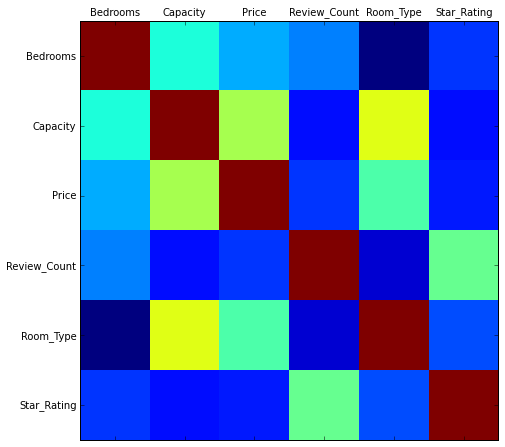

In [27]:
cols = ['Bedrooms', 'Capacity', 'Price','Review_Count','Room_Type','Star_Rating']
plot_corr(ny_df, cols)

### Colinearity of the feature variables

None of the feature variables are alarmingly correlated. Capacity and Room Type are the most correlated. Star_Rating and Review_Count are the second most. Note that Room Type correlates the most to Price, so I expect it to be an important feature in the model. 

## Use PCA and K Means to cluster the data points

In [46]:
pca_cols = ['Bedrooms','Capacity','Review_Count','Room_Type','Star_Rating']
pca_df = ny_df[pca_cols]

In [47]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_df)

In [48]:
data_scaled[:5]

array([[ 0.28412416, -0.20761749,  0.09731192,  1.02515284,  0.7081031 ],
       [ 2.45767399,  4.53349827, -0.59235647,  1.02515284, -1.62932461],
       [ 0.28412416, -0.20761749, -0.3489441 ,  1.02515284,  0.7081031 ],
       [ 0.28412416,  1.68882882, -0.59235647,  1.02515284, -1.62932461],
       [ 0.28412416, -0.20761749, -0.47065028, -0.84208983,  0.7081031 ]])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_scaled)

PCA(copy=True, n_components=5, whiten=False)

In [50]:
pca.components_

array([[-0.08050433,  0.57024628, -0.4337268 ,  0.61285296, -0.32346644],
       [ 0.66774355,  0.03616082, -0.28976996, -0.43158032, -0.53158512],
       [-0.55720941, -0.54800806, -0.47153896, -0.10531109, -0.39467129],
       [-0.20761009,  0.08129093,  0.70457717,  0.0408059 , -0.672455  ],
       [ 0.44051485, -0.60546719,  0.0955848 ,  0.65222246, -0.06946624]])

In [51]:
pca.explained_variance_ratio_

array([ 0.33445812,  0.24713447,  0.2263227 ,  0.13185806,  0.06022665])

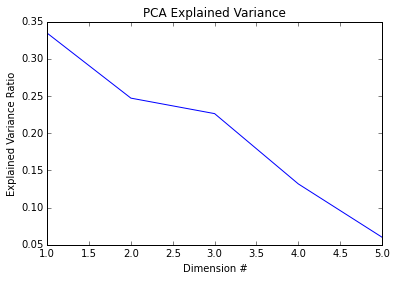

In [52]:
# plot variance explained by each dimension
X = np.linspace(1,5,5)
y = pca.explained_variance_ratio_
plt.plot(X,y)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Dimension #")
plt.title("PCA Explained Variance")

In [42]:
pca.explained_variance_

array([  6.08100187e+02,   4.11147298e+00,   1.18057326e+00,
         2.92462522e-01,   1.00955938e-01])

## Let's try some 